In [62]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [63]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [64]:
target = wine['class']

target_df = pd.DataFrame(target)
train = wine[['alcohol', 'sugar', 'pH']]

#target_df.isnull().sum(axis=0)
train.isnull().sum(axis=0)

alcohol    0
sugar      0
pH         0
dtype: int64

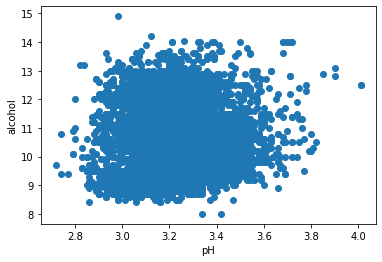

,pH,alcohol
pH,1.000000,0.121248
alcohol,0.121248,1.000000


In [65]:
import matplotlib.pyplot as plt

plt.scatter(train['pH'], train['alcohol'])

plt.xlabel('pH')
plt.ylabel('alcohol')

plt.show()

train[['pH', 'alcohol']].corr()

In [66]:
target = wine['class'].to_numpy()
train = wine[['alcohol', 'sugar', 'pH']].to_numpy()

print(type(train), type(target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [67]:
from sklearn.model_selection import train_test_split

train_input, train_test, train_target, target_tset = train_test_split(train, target, train_size=0.8, random_state=42)

print(train_input.shape, train_test.shape)

(5197, 3) (1300, 3)


In [68]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()
model.add(Dense(100, activation='sigmoid', input_shape=(3,)))
model.add(Dense(2, activation='relu'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               400       
                                                                 
 dense_8 (Dense)             (None, 2)                 202       
                                                                 
Total params: 602
Trainable params: 602
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.compile(loss='binary_crossentropy', metrics='accuracy', optimizer='sgd')
c= 'sparse_binary_crossentropy'
model.fit(train_input, train_target)
model.evaluate(train_test, target_tset)

41/41 [==============================] - 0s 925us/step - loss: 4.0000 - accuracy: 0.7377


[3.999992847442627, 0.7376922965049744]